In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data.values

# Compute Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Find neighbors within epsilon radius
def find_neighbors(data, point_idx, eps):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[point_idx], data[i]) < eps:
            neighbors.append(i)
    return neighbors

In [73]:
#plotting the values
def plot_data(data):
    print(type(data))
    X = data[:,0]
    Y = data[:,1]
    plt.scatter(X, Y)
    plt.xlabel("Weight")
    plt.ylabel("Height")
    plt.title("Height vs Weight")
    plt.plot()
    plt.show()

In [74]:

# DBSCAN Algorithm
def dbscan(data, eps, min_samples):
    labels = [0] * len(data)  # Initially all points are labeled as unvisited (0)
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != 0:  # If already visited, skip
            continue

        neighbors = find_neighbors(data, i, eps)

        if len(neighbors) < min_samples:  # Mark as noise
            labels[i] = -1
        else:  # Create a new cluster
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(data, labels, neighbors, cluster_id, eps, min_samples)

    return labels

def expand_cluster(data, labels, neighbors, cluster_id, eps, min_samples):
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]

        if labels[neighbor_idx] == -1:  # If labeled as noise, change to border point
            labels[neighbor_idx] = cluster_id

        if labels[neighbor_idx] == 0:  # If not visited
            labels[neighbor_idx] = cluster_id
            new_neighbors = find_neighbors(data, neighbor_idx, eps)
            if len(new_neighbors) >= min_samples:
                neighbors.extend(new_neighbors)  # Add new neighbors to the list

        i += 1

# Visualize the clustering result
def plot_clusters(data, labels):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:  # Noise points
            col = [0, 0, 0, 1]

        class_member_mask = (np.array(labels) == k)

        
        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('DBSCAN Clustering')
    plt.ylabel('Height')
    plt.xlabel('Weight')
    plt.show()





<class 'numpy.ndarray'>


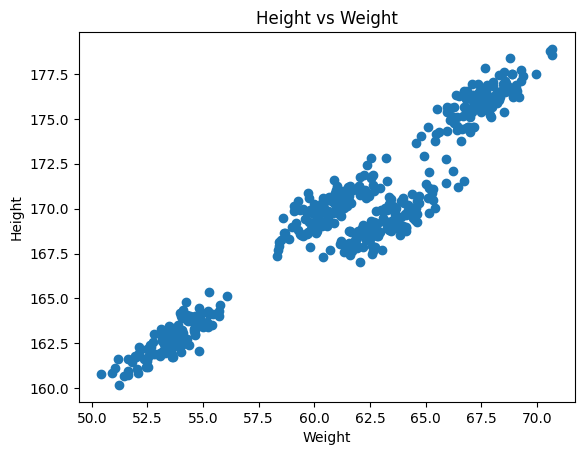

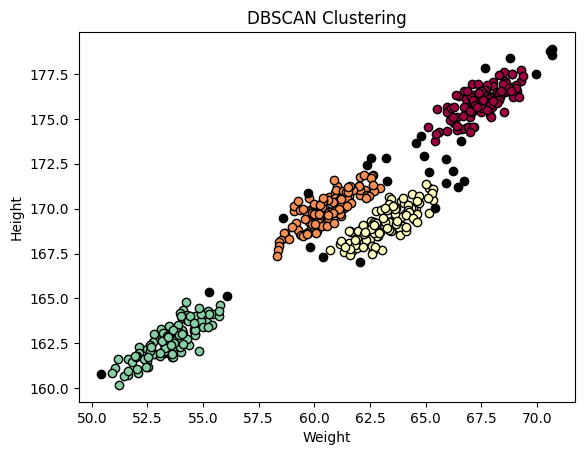

In [75]:
file_path = 'DBSCAN_Data.csv' 

data = load_data(file_path)
plot_data(data)

eps = 0.6
min_samples = 5

# Run DBSCAN
labels = dbscan(data, eps, min_samples)


# Plot the results
plot_clusters(data, labels)